## 누락값의 개수 구하기

In [3]:
import pandas as pd

In [6]:
ebola = pd.read_csv('../data/country_timeseries.csv')
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 17.3+ KB


In [5]:
print(ebola.count())

Date                   122
Day                    122
Cases_Guinea            93
Cases_Liberia           83
Cases_SierraLeone       87
Cases_Nigeria           38
Cases_Senegal           25
Cases_UnitedStates      18
Cases_Spain             16
Cases_Mali              12
Deaths_Guinea           92
Deaths_Liberia          81
Deaths_SierraLeone      87
Deaths_Nigeria          38
Deaths_Senegal          22
Deaths_UnitedStates     18
Deaths_Spain            16
Deaths_Mali             12
dtype: int64


In [7]:
ebola.shape #행, 열

(122, 18)

In [9]:
num_rows = ebola.shape[0]
print(num_rows)
num_missing = num_rows - ebola.count()
print(num_missing)

122
Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64


In [10]:
import numpy as np
print(np.count_nonzero(ebola.isnull()))

1214


In [11]:
print(np.count_nonzero(ebola['Cases_Guinea'].isnull()))

29


In [13]:
#vlaue

print(ebola.Cases_Guinea.value_counts(dropna = False).head())

NaN      29
86.0      3
495.0     2
112.0     2
390.0     2
Name: Cases_Guinea, dtype: int64


# 누락값 처리하기 _ 변경, 삭제

## 누락값 변경하기 

In [14]:
#fillna 메서드에서 0을 대입하면 누락값을 0으로 변경 
#df 의 크기가 매우 크고 메모리를 효율적으로 사용해야 하는 경우
print(ebola.fillna(0).iloc[0:10, 0:5])

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0            0.0            10030.0
1    1/4/2015  288        2775.0            0.0             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286           0.0         8157.0                0.0
4  12/31/2014  284        2730.0         8115.0             9633.0
5  12/28/2014  281        2706.0         8018.0             9446.0
6  12/27/2014  280        2695.0            0.0             9409.0
7  12/24/2014  277        2630.0         7977.0             9203.0
8  12/21/2014  273        2597.0            0.0             9004.0
9  12/20/2014  272        2571.0         7862.0             8939.0


In [15]:
#ffill 바로 앞 값으로 채워주세요 없으면 NaN으로 표기 
print(ebola.fillna(method = 'ffill').iloc[0:10, 0:5]) 

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0            NaN            10030.0
1    1/4/2015  288        2775.0            NaN             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286        2769.0         8157.0             9722.0
4  12/31/2014  284        2730.0         8115.0             9633.0
5  12/28/2014  281        2706.0         8018.0             9446.0
6  12/27/2014  280        2695.0         8018.0             9409.0
7  12/24/2014  277        2630.0         7977.0             9203.0
8  12/21/2014  273        2597.0         7977.0             9004.0
9  12/20/2014  272        2571.0         7862.0             8939.0


In [16]:
#bfill 뒤에 값으로 채워주세요
#마지막 값이 누락값인 경우 처리하지 못하는 단점이 있음
print(ebola.fillna(method = 'bfill').iloc[0:10, 0:5]) 

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0         8166.0            10030.0
1    1/4/2015  288        2775.0         8166.0             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286        2730.0         8157.0             9633.0
4  12/31/2014  284        2730.0         8115.0             9633.0
5  12/28/2014  281        2706.0         8018.0             9446.0
6  12/27/2014  280        2695.0         7977.0             9409.0
7  12/24/2014  277        2630.0         7977.0             9203.0
8  12/21/2014  273        2597.0         7862.0             9004.0
9  12/20/2014  272        2571.0         7862.0             8939.0


In [17]:
#interpolate 메서드는 누락값 양족ㅔ 있는 값을 이용하여 중간값으로 채움 
print(ebola.interpolate().iloc[0:10, 0:5])

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0            NaN            10030.0
1    1/4/2015  288        2775.0            NaN             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286        2749.5         8157.0             9677.5
4  12/31/2014  284        2730.0         8115.0             9633.0
5  12/28/2014  281        2706.0         8018.0             9446.0
6  12/27/2014  280        2695.0         7997.5             9409.0
7  12/24/2014  277        2630.0         7977.0             9203.0
8  12/21/2014  273        2597.0         7919.5             9004.0
9  12/20/2014  272        2571.0         7862.0             8939.0


## 누락값 삭제하기 

In [18]:
print(ebola.shape)

(122, 18)


In [21]:
# dropna 메서드 : 누락값 삭제 누락값이 포함된 모든 행들이 모두 삭제
ebola_dropna = ebola.dropna()
print(ebola_dropna.shape)

(1, 18)


## 누라값이 포함된 데이터 계산하기

In [22]:
ebola['Cases_multiple'] = ebola['Cases_Guinea'] + ebola['Cases_Liberia'] \
                            + ebola['Cases_SierraLeone'] 

In [23]:
ebola_subset = ebola.loc[:,
        ['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone', 'Cases_multiple']]
print(ebola_subset.head(n=10))

#누락값이 있는 데이터를 합치먄 누락값이 됨 

   Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_multiple
0        2776.0            NaN            10030.0             NaN
1        2775.0            NaN             9780.0             NaN
2        2769.0         8166.0             9722.0         20657.0
3           NaN         8157.0                NaN             NaN
4        2730.0         8115.0             9633.0         20478.0
5        2706.0         8018.0             9446.0         20170.0
6        2695.0            NaN             9409.0             NaN
7        2630.0         7977.0             9203.0         19810.0
8        2597.0            NaN             9004.0             NaN
9        2571.0         7862.0             8939.0         19372.0


In [24]:
#sum 메서드를 그냥 사용하면 누락값을 포함하여 계산
#누락값을 무시한 채 계산하려면  skipna 인잣값을 True 설정 
print(ebola.Cases_Guinea.sum(skipna = True))

84729.0


# melt 메서드 

## 1개의 열만 고정하고 나머지 열은 행으로 바꾸기
* 퓨 리서치 센터에서 조사한 '미국의 소득과 종교' 데이터
* 데이터프레임의 열은 열 자체가 어떤 값 (<10k10-20k..know/refused) 의미 
* 데이터프레임의 열이 옆으로 길게 늘어선 형태

In [26]:
import pandas as pd
pew = pd.read_csv('../data/pew.csv')
print(pew.head())

             religion  <$10k  $10-20k  $20-30k  $30-40k  $40-50k  $50-75k  \
0            Agnostic     27       34       60       81       76      137   
1             Atheist     12       27       37       52       35       70   
2            Buddhist     27       21       30       34       33       58   
3            Catholic    418      617      732      670      638     1116   
4  Don’t know/refused     15       14       15       11       10       35   

   $75-100k  $100-150k  >150k  Don't know/refused  
0       122        109     84                  96  
1        73         59     74                  76  
2        62         39     53                  54  
3       949        792    633                1489  
4        21         17     18                 116  


## melt 메서드 
* 지정한 열의 데이터를 모두 행으로 정리해 줍니다,
* melt 메서드 인자 
 * id_vars 위치를 그대로 유지할 열의 이름을 지정 
 * value_vars 행으로 위치를 변경할 열의 이름을 지정 
 * var_name : value_vars 로 위치를 변경할 열의 이름을 지정
 * value_name 으로 위치를 변경할 열의 데이터를 저장할 열의 이름을 지정

In [27]:
print(pew.iloc[:, 0:6])

                   religion  <$10k  $10-20k  $20-30k  $30-40k  $40-50k
0                  Agnostic     27       34       60       81       76
1                   Atheist     12       27       37       52       35
2                  Buddhist     27       21       30       34       33
3                  Catholic    418      617      732      670      638
4        Don’t know/refused     15       14       15       11       10
5          Evangelical Prot    575      869     1064      982      881
6                     Hindu      1        9        7        9       11
7   Historically Black Prot    228      244      236      238      197
8         Jehovah's Witness     20       27       24       24       21
9                    Jewish     19       19       25       25       30
10            Mainline Prot    289      495      619      655      651
11                   Mormon     29       40       48       51       56
12                   Muslim      6        7        9       10        9
13    

In [29]:
pew_long = pd.melt(pew, id_vars = 'religion')
print(pew_long.head())

             religion variable  value
0            Agnostic    <$10k     27
1             Atheist    <$10k     12
2            Buddhist    <$10k     27
3            Catholic    <$10k    418
4  Don’t know/refused    <$10k     15


In [30]:
pew_long = pd.melt(pew, id_vars = 'religion', var_name = 'income', value_name = 'count')
print(pew_long.head())

             religion income  count
0            Agnostic  <$10k     27
1             Atheist  <$10k     12
2            Buddhist  <$10k     27
3            Catholic  <$10k    418
4  Don’t know/refused  <$10k     15


## 2개 이상의 열을 고정하고 나머지 열을 행으로 바꾸기 

In [35]:
billboard = pd.read_csv('../data/billboard.csv')
print(billboard.iloc[0:5, 0:16])
print(billboard.shape)

   year        artist                    track  time date.entered  wk1   wk2  \
0  2000         2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   87  82.0   
1  2000       2Ge+her  The Hardest Part Of ...  3:15   2000-09-02   91  87.0   
2  2000  3 Doors Down               Kryptonite  3:53   2000-04-08   81  70.0   
3  2000  3 Doors Down                    Loser  4:24   2000-10-21   76  76.0   
4  2000      504 Boyz            Wobble Wobble  3:35   2000-04-15   57  34.0   

    wk3   wk4   wk5   wk6   wk7   wk8   wk9  wk10  wk11  
0  72.0  77.0  87.0  94.0  99.0   NaN   NaN   NaN   NaN  
1  92.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2  68.0  67.0  66.0  57.0  54.0  53.0  51.0  51.0  51.0  
3  72.0  69.0  67.0  65.0  55.0  59.0  62.0  61.0  61.0  
4  25.0  17.0  17.0  31.0  36.0  49.0  53.0  57.0  64.0  
(317, 81)


In [34]:
billboard_long = pd.melt(billboard,
                        id_vars = ['year', 'artist', 'track', 'time', 'date.entered'],
                        var_name = 'week', value_name = 'rating')
print(billboard_long.head())
print(billboard_long.shape)

   year        artist                    track  time date.entered week  rating
0  2000         2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk1    87.0
1  2000       2Ge+her  The Hardest Part Of ...  3:15   2000-09-02  wk1    91.0
2  2000  3 Doors Down               Kryptonite  3:53   2000-04-08  wk1    81.0
3  2000  3 Doors Down                    Loser  4:24   2000-10-21  wk1    76.0
4  2000      504 Boyz            Wobble Wobble  3:35   2000-04-15  wk1    57.0
(24092, 7)


## ebola 데이터 집합 살펴보기 

In [53]:
#Cases_Guinea 발병국가 , Deaths_Guinea 사망자수 
#열이 의미를 가지고 있다 

ebola = pd.read_csv('../data/country_timeseries.csv')
print(ebola.columns)

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')


In [54]:
print(ebola.iloc[:5, [0, 1, 2, 3, 10, 11]])

         Date  Day  Cases_Guinea  Cases_Liberia  Deaths_Guinea  Deaths_Liberia
0    1/5/2015  289        2776.0            NaN         1786.0             NaN
1    1/4/2015  288        2775.0            NaN         1781.0             NaN
2    1/3/2015  287        2769.0         8166.0         1767.0          3496.0
3    1/2/2015  286           NaN         8157.0            NaN          3496.0
4  12/31/2014  284        2730.0         8115.0         1739.0          3471.0


In [55]:
ebola_long = pd.melt(ebola, id_vars = ['Date', 'Day'])
print(ebola_long.head())

         Date  Day      variable   value
0    1/5/2015  289  Cases_Guinea  2776.0
1    1/4/2015  288  Cases_Guinea  2775.0
2    1/3/2015  287  Cases_Guinea  2769.0
3    1/2/2015  286  Cases_Guinea     NaN
4  12/31/2014  284  Cases_Guinea  2730.0


In [56]:
#split 메서드에 '-_' 를 전달 Cases, Guinea 로 분리 
variable_split = ebola_long.variable.str.split('_')
print(variable_split[:5])

0    [Cases, Guinea]
1    [Cases, Guinea]
2    [Cases, Guinea]
3    [Cases, Guinea]
4    [Cases, Guinea]
Name: variable, dtype: object


In [57]:
print(type(variable_split))

<class 'pandas.core.series.Series'>


In [58]:
print(type(variable_split[0]))

<class 'list'>


In [59]:
status_values = variable_split.str.get(0)
country_values = variable_split.str.get(1)

print(status_values)


0        Cases
1        Cases
2        Cases
3        Cases
4        Cases
         ...  
1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, Length: 1952, dtype: object


In [60]:
print(status_values[-5:])

1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, dtype: object


In [61]:
print(country_values[:5])

0    Guinea
1    Guinea
2    Guinea
3    Guinea
4    Guinea
Name: variable, dtype: object


In [62]:
print(country_values[-5:])

1947    Mali
1948    Mali
1949    Mali
1950    Mali
1951    Mali
Name: variable, dtype: object


In [63]:
ebola_long['status'] = status_values
ebola_long['country'] = country_values
print(ebola_long.head())

         Date  Day      variable   value status country
0    1/5/2015  289  Cases_Guinea  2776.0  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  Cases  Guinea


## concat 메서드를 응용하여 데이터프레임에 열 추가하기

In [64]:
variable_split = ebola_long.variable.str.split('_', expand = True)
variable_split.columns = ['status', 'country']
ebola_parsed = pd.concat([ebola_long, variable_split], axis = 1)

print(ebola_parsed.head())

         Date  Day      variable   value status country status country
0    1/5/2015  289  Cases_Guinea  2776.0  Cases  Guinea  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  Cases  Guinea  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  Cases  Guinea  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  Cases  Guinea  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  Cases  Guinea  Cases  Guinea


## 기상데이터의 여러 열을 하나로 정리하기 - melt, pivot_table 메서드

In [65]:
weather = pd.read_csv('../data/weather.csv')
print(weather.iloc[:5, :11])

        id  year  month element  d1    d2    d3  d4    d5  d6  d7
0  MX17004  2010      1    tmax NaN   NaN   NaN NaN   NaN NaN NaN
1  MX17004  2010      1    tmin NaN   NaN   NaN NaN   NaN NaN NaN
2  MX17004  2010      2    tmax NaN  27.3  24.1 NaN   NaN NaN NaN
3  MX17004  2010      2    tmin NaN  14.4  14.4 NaN   NaN NaN NaN
4  MX17004  2010      3    tmax NaN   NaN   NaN NaN  32.1 NaN NaN


In [66]:
weather_melt = pd.melt(weather, id_vars = ['id', 'year', 'month', 'element'], 
                      var_name = 'day', value_name = 'temp')
print(weather_melt.head())

        id  year  month element day  temp
0  MX17004  2010      1    tmax  d1   NaN
1  MX17004  2010      1    tmin  d1   NaN
2  MX17004  2010      2    tmax  d1   NaN
3  MX17004  2010      2    tmin  d1   NaN
4  MX17004  2010      3    tmax  d1   NaN


In [67]:
#index 인자 : 위치를 그대로 유지할 열 이름을 지정 
#columns : 피벗할 열 이름 지정 

weather_tidy = weather_melt.pivot_table(
    index = ['id', 'year', 'month', 'day'],
    columns = 'element',
    values = 'temp'
)

print(weather_tidy)

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4
             3     d10  34.5  16.8
                   d16  31.1  17.6
                   d5   32.1  14.2
             4     d27  36.3  16.7
             5     d27  33.2  18.2
             6     d17  28.0  17.5
                   d29  30.1  18.0
             7     d3   28.6  17.5
                   d14  29.9  16.5
             8     d23  26.4  15.0
                   d5   29.6  15.8
                   d29  28.0  15.3
                   d13  29.8  16.5
                   d25  29.7  15.6
                   d31  25.4  15.4
                   d8   29.0  17.3
             10    d5   27.0  14.0
                   d14  29.5  13.0
                   d15  28.7  10.5
                   d28  31.2  15.0
                   d7   28.1  12.9
             11    d

In [68]:
weather_tidy_flat = weather_tidy.reset_index()
print(weather_tidy_flat.head())

element       id  year  month  day  tmax  tmin
0        MX17004  2010      1  d30  27.8  14.5
1        MX17004  2010      2  d11  29.7  13.4
2        MX17004  2010      2   d2  27.3  14.4
3        MX17004  2010      2  d23  29.9  10.7
4        MX17004  2010      2   d3  24.1  14.4


## 빌보드 차트의 중복 데이터 처리하기 


In [79]:
billboard = pd.read_csv('../data/billboard.csv')
billboard_long = pd.melt(billboard,
                        id_vars = ['year', 'artist', 'track', 'time', 'date.entered'],
                        var_name = 'week', value_name = 'rating')

print(billboard_long.shape)
print(billboard_long.head())

(24092, 7)
   year        artist                    track  time date.entered week  rating
0  2000         2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk1    87.0
1  2000       2Ge+her  The Hardest Part Of ...  3:15   2000-09-02  wk1    91.0
2  2000  3 Doors Down               Kryptonite  3:53   2000-04-08  wk1    81.0
3  2000  3 Doors Down                    Loser  4:24   2000-10-21  wk1    76.0
4  2000      504 Boyz            Wobble Wobble  3:35   2000-04-15  wk1    57.0


In [80]:
print(billboard_long[billboard_long.track == 'Loser'].head())

      year        artist  track  time date.entered week  rating
3     2000  3 Doors Down  Loser  4:24   2000-10-21  wk1    76.0
320   2000  3 Doors Down  Loser  4:24   2000-10-21  wk2    76.0
637   2000  3 Doors Down  Loser  4:24   2000-10-21  wk3    72.0
954   2000  3 Doors Down  Loser  4:24   2000-10-21  wk4    69.0
1271  2000  3 Doors Down  Loser  4:24   2000-10-21  wk5    67.0


In [81]:
#중복데이터를 가지고 있는 'year', 'artist', 'track', 'time'열을 따로 모아 df에 저장

billboard_songs = billboard_long[['year', 'artist', 'track', 'time']]
print(billboard_songs.shape)

(24092, 4)


In [82]:
#drop_duplicates 메서드로 df의 중복데이터를 제거합니다. 

billboard_songs = billboard_songs.drop_duplicates()
print(billboard_songs.shape)

(317, 4)


In [85]:
billboard_songs['id'] = range(len(billboard_songs))
print(billboard_songs.head(n=10))

   year          artist                    track  time  id
0  2000           2 Pac  Baby Don't Cry (Keep...  4:22   0
1  2000         2Ge+her  The Hardest Part Of ...  3:15   1
2  2000    3 Doors Down               Kryptonite  3:53   2
3  2000    3 Doors Down                    Loser  4:24   3
4  2000        504 Boyz            Wobble Wobble  3:35   4
5  2000            98^0  Give Me Just One Nig...  3:24   5
6  2000         A*Teens            Dancing Queen  3:44   6
7  2000         Aaliyah            I Don't Wanna  4:15   7
8  2000         Aaliyah                Try Again  4:03   8
9  2000  Adams, Yolanda            Open My Heart  5:30   9


In [86]:
billboard_ratings = billboard_long.merge(billboard_songs,
                                        on = ['year', 'artist', 'track', 'time'])

print(billboard_ratings.shape)

(24092, 8)


In [87]:
print(billboard_ratings.head())

   year artist                    track  time date.entered week  rating  id
0  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk1    87.0   0
1  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk2    82.0   0
2  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk3    72.0   0
3  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk4    77.0   0
4  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk5    87.0   0


## 뉴욕 택시 데이터 

* 13억 대의 뉴욕 택시에 대한 정보, 파일 -140개 

In [88]:
#glob 라이브러리에 포함 glob 메서드는 특정한 패턴의 이름을 가진 파일을
#한 번에 읽어 들일 수 있다.

import glob
nyc_taxi_data = glob.glob('../data/fhv_*')
print(nyc_taxi_data)

['../data\\fhv_tripdata_2015-01.csv', '../data\\fhv_tripdata_2015-02.csv', '../data\\fhv_tripdata_2015-03.csv', '../data\\fhv_tripdata_2015-04.csv', '../data\\fhv_tripdata_2015-05.csv']


In [89]:
taxi1 = pd.read_csv(nyc_taxi_data[0])
taxi2 = pd.read_csv(nyc_taxi_data[1])
taxi3 = pd.read_csv(nyc_taxi_data[2])
taxi4 = pd.read_csv(nyc_taxi_data[3])
taxi5 = pd.read_csv(nyc_taxi_data[4])


In [91]:
print(taxi1.head(n=2))
print(taxi2.head(n=2))

  Dispatching_base_num          Pickup_date  locationID
0               B00013  2015-01-01 00:30:00         NaN
1               B00013  2015-01-01 01:22:00         NaN
  Dispatching_base_num          Pickup_date  locationID
0               B00013  2015-02-01 00:00:00         NaN
1               B00013  2015-02-01 00:01:00         NaN


In [92]:
print(taxi1.shape)
print(taxi2.shape)
print(taxi3.shape)
print(taxi4.shape)
print(taxi5.shape)

(2746033, 3)
(3126401, 3)
(3281427, 3)
(3917789, 3)
(4296067, 3)


In [94]:
taxi = pd.concat([taxi1, taxi2, taxi3, taxi4, taxi5])

print(taxi.shape)

(17367717, 3)


## 반복문으로 데이터 준비하기

In [96]:
list_taxi_df = []

for csv_filename in nyc_taxi_data:
    print(csv_filename)
    df = pd.read_csv(csv_filename)
    list_taxi_df.append(df)

print(len(list_taxi_df))

../data\fhv_tripdata_2015-01.csv
../data\fhv_tripdata_2015-02.csv
../data\fhv_tripdata_2015-03.csv
../data\fhv_tripdata_2015-04.csv
../data\fhv_tripdata_2015-05.csv
5


In [97]:
print(type(list_taxi_df[0]))

<class 'pandas.core.frame.DataFrame'>


In [98]:
taxi_loop_concat = pd.concat(list_taxi_df)
print(taxi_loop_concat.shape)

(17367717, 3)


In [99]:
print(taxi.equals(taxi_loop_concat))

True


# 운동량 데이터 분석해 보기 

## 데이터를 저장하고 읽기


In [119]:
import pandas as pd 

practice = pd.DataFrame({'날짜':[], '운동':[], '양':[]})
practice

,날짜,운동,양


In [120]:
practice.loc[0] = ['19-3-1', '달리기', 1]
practice

,날짜,운동,양
0,19-3-1,달리기,1.0


In [121]:
practice.loc[1] = ['19-3-2', '걷기', 1]
practice.loc[2] = ['19-3-2', '달리기', 1]
practice.loc[3] = ['19-3-2', '계단오르기', 1]
practice

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0


In [122]:
practice.loc[4] = ['19-3-3', '걷기', 1.5]
practice.loc[5] = ['19-3-3', '달리기', 1]
practice


,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0
4,19-3-3,걷기,1.5
5,19-3-3,달리기,1.0


In [123]:
practice.to_csv("../data/practice.csv", encoding = 'utf-8')

In [128]:
practice = pd.read_csv('../data/practice.csv',index_col = 0, encoding = 'utf-8')
practice

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0
4,19-3-3,걷기,1.5
5,19-3-3,달리기,1.0


In [129]:
practice.loc[6] = ['19-3-4', '걷기', 1.5]
practice.loc[7] = ['19-3-5', '달리기', 1.]
practice.loc[8] = ['19-3-6', '걷기', 2.5]
practice.loc[9] = ['19-3-6', '달리기', 0.5]
practice

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0
4,19-3-3,걷기,1.5
5,19-3-3,달리기,1.0
6,19-3-4,걷기,1.5
7,19-3-5,달리기,1.0
8,19-3-6,걷기,2.5
9,19-3-6,달리기,0.5


# 데이터를 정리하는 마법같은 단어 pivot_table

In [157]:
practice.pivot_table(index = '운동')

,양
운동,
걷기,1.625
계단오르기,1.000
달리기,0.900


In [158]:
import numpy as np 
practice.pivot_table(index = '운동', aggfunc = np.sum)

,양
운동,
걷기,6.5
계단오르기,1.0
달리기,4.5


In [159]:
practice.pivot_table(index = '운동', aggfunc = [np.sum, len])

sum len     
         양  날짜    양
운동                 
걷기     6.5   4  4.0
계단오르기  1.0   1  1.0
달리기    4.5   5  5.0

# 운동을 하지 않는 이유 데이터 분석

In [160]:
not_exercise = pd.read_excel("../data/not_exercise.xls")

not_exercise.head()

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,2017,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,2017,성별,남자,55.2,7.9,5.5,29.8,1.6
2,2017,성별,여자,45.0,8.3,6.0,38.8,1.8
3,2017,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,2017,연령별,20대,54.8,6.9,5.2,32.9,0.1


In [161]:
#기간 칼럼 삭제
not_exercise.drop(columns = '기간', inplace = True)
not_exercise

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8
3,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,연령별,40대,57.7,6.8,5.2,29.4,1
7,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,연령별,60대 이상,27.5,12.8,6.9,46.8,6
9,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4


In [162]:
#목적과 상관없는 인덱스 22부터 삭제
not_exercise.drop(index = range(22, 53), inplace = True)
not_exercise

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8
3,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,연령별,40대,57.7,6.8,5.2,29.4,1
7,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,연령별,60대 이상,27.5,12.8,6.9,46.8,6
9,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4


In [163]:
not_exercise['대분류'] == '성별'

0     False
1      True
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
Name: 대분류, dtype: bool

In [164]:
not_ex_sex = not_exercise[not_exercise['대분류'] == '성별'].copy()
not_ex_sex

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8


In [165]:
test_a = [1, 2, 3, 4]
test_a

[1, 2, 3, 4]

In [166]:
test_b = test_a
test_b

[1, 2, 3, 4]

In [167]:
test_b[2] = 0
test_b

[1, 2, 0, 4]

In [168]:
test_a
#즉, test_b = test_a  공간을 준비하는 것이 아니라 같은 주소를 가리키고 있다. 

[1, 2, 0, 4]

In [169]:
#copy 옵션 사용
test_c = test_a.copy()
test_c

[1, 2, 0, 4]

In [170]:
test_c[2] = 100
test_c

[1, 2, 100, 4]

In [171]:
test_a

[1, 2, 0, 4]

In [172]:
not_ex_sex.drop(columns = '대분류', inplace = True)
not_ex_sex

,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,남자,55.2,7.9,5.5,29.8,1.6
2,여자,45.0,8.3,6.0,38.8,1.8


In [173]:
#reset_index 기존의 행 인덱스를 제거하고 인데스를 데이터 열로 추가 
#set_index 기존의 행 인덱스를 제거하고 데이터 열 중 하나를 인덱스로 설정 

not_ex_sex.set_index('분류', inplace = True)
not_ex_sex

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
분류,,,,,
남자,55.2,7.9,5.5,29.8,1.6
여자,45.0,8.3,6.0,38.8,1.8


In [175]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

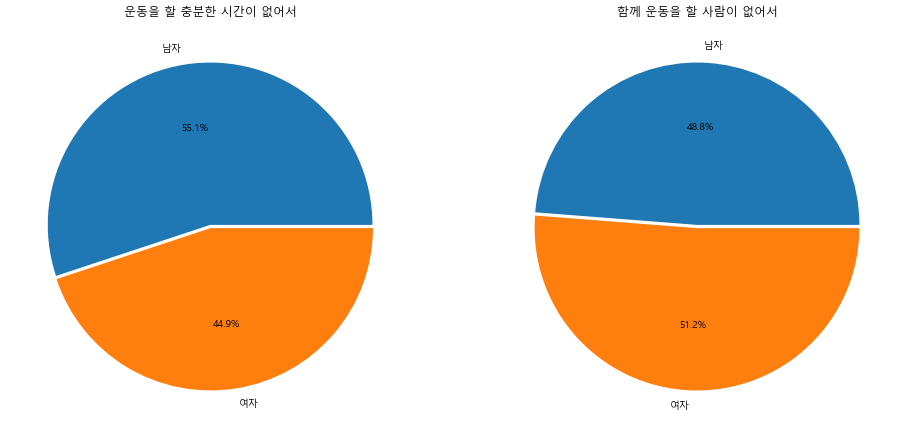

In [179]:
f, ax = plt.subplots(1, 2, figsize = (16, 8))

not_ex_sex['운동을 할 충분한 시간이 없어서'].plot.pie(
    explode = [0, 0.02], ax = ax[0], autopct = '%1.1f%%')

ax[0].set_title('운동을 할 충분한 시간이 없어서')
ax[0].set_ylabel('')
    
not_ex_sex['함께 운동을 할 사람이 없어서'].plot.pie(
    explode = [0, 0.02], ax = ax[1], autopct = '%1.1f%%')
ax[1].set_title('함께 운동을 할 사람이 없어서')
ax[1].set_ylabel('')

plt.show()